In [1]:
import sys
sys.path.append('../')

from cogsci2017.environment.arm_diva_env import CogSci2017Environment
from cogsci2017.learning.supervisor import Supervisor
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

iterations = 50000

environment = CogSci2017Environment(gui=False, audio=False)


config = dict(m_mins=environment.conf.m_mins,
             m_maxs=environment.conf.m_maxs,
             s_mins=environment.conf.s_mins,
             s_maxs=environment.conf.s_maxs)

agent = Supervisor(config, model_babbling="random", n_motor_babbling=1000, explo_noise=0.05)



human sounds ['uye', 'yeo', 'eyu', 'eou', 'oey', 'iuo']


In [2]:
for i in range(iterations):
    if i % (iterations/10) == 0:
        print "Iteration", i
    context = environment.get_current_context()
    m = agent.produce(context)
    s = environment.update(m)
    agent.perceive(s)
#    s_traj = environment.diva_traj
#    if s_traj is not None:
#        if i < 100:
#            plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="r", alpha=0.2)
#        else:
#            plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="b", alpha=0.2)
#            
#plt.xlim([-11.25,-9.5])
#plt.ylim([-9.25, -7.5])

Iteration 0


../cogsci2017/environment/diva/diva.py:169: RuntimeWarning: invalid value encountered in log2
  formants = log2(transpose(res[self.s_used,:]))


best_vocal_errors [('uye', 1.0309148856835151), ('yeo', 0.67355459215388913), ('eyu', 0.72429560727855724), ('eou', 0.89139872211154292), ('oey', 0.75577812180755499), ('iuo', 0.71475553214829868)]

----------------
Agent Statistics
----------------

#Iterations: 1000

# Chosen module mod1 : 0
# Chosen module mod2 : 0
# Chosen module mod3 : 0
# Chosen module mod4 : 0
# Chosen module mod5 : 0
# Chosen module mod6 : 0
# Chosen module mod10 : 0
# Chosen module mod11 : 0
# Chosen module mod12 : 0
# Chosen module mod13 : 0

Competence progress of mod1  :  0.0
Competence progress of mod2  :  0.0
Competence progress of mod3  :  0.0
Competence progress of mod4  :  0.0
Competence progress of mod5  :  0.0
Competence progress of mod6  :  0.0
Competence progress of mod10 :  0.0
Competence progress of mod11 :  0.0
Competence progress of mod12 :  0.0
Competence progress of mod13 :  0.0

Prediction progress of mod1  :  0.0
Prediction progress of mod2  :  0.0
Prediction progress of mod3  :  0.0
Predic

error eou 0.806904391848


(-9.25, -7.5)

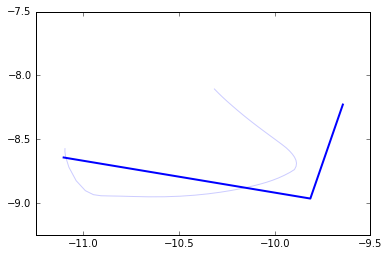

In [3]:
#for hs in human_sounds:
hs = "eou"
agent.modules["mod13"].sm.sigma_expl = np.array([0.1]*28)
#print agent.modules["mod13"].sm.sigma_expl
m = agent.modules["mod13"].inverse(np.array(environment.human_sounds_traj_std[hs]), explore=True) 
#print m
s = environment.update([0.]*21 + list(m))
s_traj = environment.diva_traj
#print s_traj
error = np.linalg.norm(np.array(environment.human_sounds_traj[hs]) - np.array([f[0] for f in s_traj[[0, 12, 24, 37, 49]]] + [f[1] for f in s_traj[[0, 12, 24, 37, 49]]]))
print "error", hs, error


plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="b", alpha=0.2)    
plt.plot(- np.array(environment.human_sounds_traj[hs][5:]), -np.array(environment.human_sounds_traj[hs][:5]), lw=2)

plt.xlim([-11.25,-9.5])
plt.ylim([-9.25, -7.5])

In [4]:

for i in range(100):
    context = environment.get_current_context()[:4]
    s_goal = [2. * np.random.random() - 1. for _ in range(10)]

    m = agent.modules["mod10"].inverse(np.array(context + s_goal), explore=True)
    m = [0.] * 21 + list(m)
    s = environment.update(m)
    if environment.produced_sound:
        print environment.produced_sound
    agent.perceive(s)

***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye
***********Agent says uye
uye


In [5]:
print agent.modules["mod10"].sm.model.imodel.fmodel.dataset.data[1]

[array([ 0.01684277,  0.61812427,  0.62943932, -0.02164742,  0.01982154,
        0.05332643,  0.08302465,  0.11140242,  0.13450234,  0.61183479,
        0.54109137,  0.47838547,  0.41846763,  0.36969364]), array([ 0.54560211, -0.26803997,  0.01821853, -0.89822441,  0.54023718,
        0.47989302,  0.42640486,  0.37529492,  0.33369069, -0.26985069,
       -0.29021751, -0.30827035, -0.32552052, -0.3395624 ]), array([ 0.56179625, -0.22758725,  0.57609364, -0.10144791,  0.55905875,
        0.5282677 ,  0.50097497,  0.47489575,  0.45366688, -0.22581861,
       -0.20592521, -0.188292  , -0.17144281, -0.15772732]), array([ 0.16693855, -0.33224213, -0.92606371,  0.42336954,  0.16063885,
        0.08978042,  0.02697258, -0.03304266, -0.08189594, -0.32680287,
       -0.26562252, -0.21139319, -0.15957504, -0.11739431]), array([-0.10693495,  0.15740822, -0.4637949 ,  0.22890133, -0.10818458,
       -0.12224023, -0.13469895, -0.14660372, -0.15629438,  0.15697865,
        0.15214683,  0.14786397,  0

In [6]:
# TEST EVAL
n_goals = 20

eval_results = {}

for region in [1, 2, 3]:  
    print
    print "region", region
    eval_results[region] = {}
    for i in range(n_goals):
        eval_results[region][i] = {}
        environment.reset_toys(region=region)
        print environment.get_current_context()
        print environment.current_toy1
        for toy in ["toy1"]:
            print
            print toy
            eval_results[region][i][toy] = {}
                                    
            if toy == "toy1":
                goal = [environment.current_toy1[0] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]] + \
                       [environment.current_toy1[1] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]]
                arm_mid = "mod3"
                diva_mid = "mod10"
            elif toy == "toy2":
                goal = [environment.current_toy2[0] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]] + \
                       [environment.current_toy2[1] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]]
                arm_mid = "mod4"
                diva_mid = "mod11"
            elif toy == "toy3":
                goal = [environment.current_toy3[0] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]] + \
                       [environment.current_toy3[1] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]]
                arm_mid = "mod5"
                diva_mid = "mod12"
                
            print "goal", i, goal
            print "context", environment.get_current_context()
            context = list(agent.modules[arm_mid].get_c(environment.get_current_context()))
            dists, idxs = agent.modules[arm_mid].sm.model.imodel.fmodel.dataset.nn_y(context+goal)
            arm_dist = dists[0]
            print "NN arm", agent.modules[arm_mid].sm.model.imodel.fmodel.dataset.get_y(idxs [0])
            
            if len(agent.modules[diva_mid].sm.model.imodel.fmodel.dataset) > 0:
                context = list(agent.modules[diva_mid].get_c(environment.get_current_context()))
                dists, _ = agent.modules[diva_mid].sm.model.imodel.fmodel.dataset.nn_y(context+goal)
                diva_dist = dists[0]
            else:
                diva_dist = np.inf
            
            print "arm dist", arm_dist
            print "diva_dist", diva_dist
            
            if arm_dist < diva_dist:
                m = agent.modules[arm_mid].inverse(np.array(context + goal), explore=False)            
                m = list(m) + [0.]*28
            else:
                m = agent.modules[diva_mid].inverse(np.array(context + goal), explore=False)            
                m = [0.]*21 + list(m)
                
            s = environment.update(m)
            #print "s", s
            
            if toy == "toy1":
                reached = s[30:40]
            elif toy == "toy2":
                reached = s[40:50]
            elif toy == "toy3":
                reached = s[50:60]
                
            comp_error = np.linalg.norm(np.array(reached) - np.array(goal))
            print "reached", reached, "error", comp_error
            
            eval_results[region][i][toy]["comp_error"] = comp_error
            eval_results[region][i][toy]["arm_dist"] = arm_dist
            eval_results[region][i][toy]["diva_dist"] = diva_dist


region 1
[-0.25333820069755275, -0.35497794426714624, 0.054638271810639773, 0.029987660017542217, -0.19736373225486645, -0.3483744729463033, -0.44091438157906898, -0.13859018815878613, -0.5718146343049633, -0.19316842728813244]
[0.10927654362127955, 0.059975320035084434, 0.0]

toy1
goal 0 [0.054638271810639773, 0.038246790267447837, 0.027319135905319886, 0.010927654362127953, 0.0, 0.029987660017542217, 0.020991362012279552, 0.014993830008771108, 0.0059975320035084417, 0.0]
context [-0.25333820069755275, -0.35497794426714624, 0.054638271810639773, 0.029987660017542217, -0.19736373225486645, -0.3483744729463033, -0.44091438157906898, -0.13859018815878613, -0.5718146343049633, -0.19316842728813244]
NN arm [-0.19699414 -0.45928876  0.01373576  0.01954081  0.01373576  0.01373576
  0.01373576  0.01373576  0.09285212  0.01954081  0.01954081  0.01954081
  0.01954081 -0.01819863]
arm dist 0.166047561162
diva_dist 0.280537540589
reached [ 0.05463827  0.05463827  0.05463827  0.05463827  0.054638

In [7]:
print environment.get_current_context()
print environment.current_toy1

[-0.12389187658937934, -0.1448005893841228, -0.83649664488175834, 0.27964460956084197, -0.0060249751674190527, 0.89223991993584018, -0.27029989355596495, -0.86876900973878579, -0.7520775881987714, 0.7308109497931856]
[-1.6729932897635167, 0.55928921912168394, 0.0]
